In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.csv to Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Dataset.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [ ]:
# Remove quotes from all string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace("'", "")

# Drop 'zipcodeOri' as it's constant
df.drop(columns=['zipcodeOri'], inplace=True)

# Show cleaned dataset
df.head()


,step,customer,age,gender,merchant,zipMerchant,category,amount,fraud
0,11,C1760492708,1,F,M1823072687,28007,es_transportation,52.35,0
1,172,C1222389110,3,M,M1823072687,28007,es_transportation,14.75,0
2,106,C879949041,3,F,M1823072687,28007,es_transportation,3.73,0
3,86,C409740988,5,M,M1823072687,28007,es_transportation,61.42,0
4,152,C671449181,3,F,M692898500,28007,es_health,9.05,0


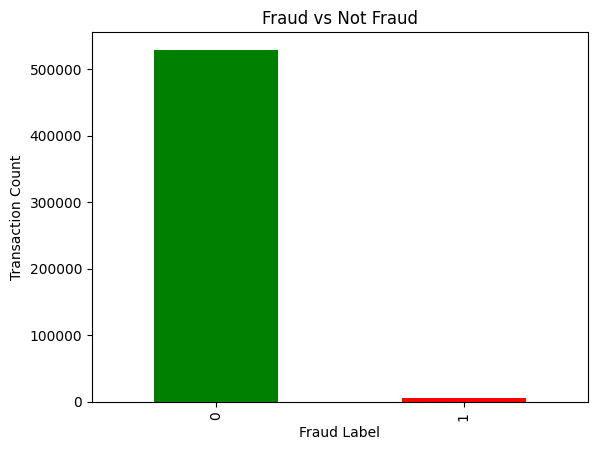

In [ ]:
# Show how many fraud vs non-fraud
df['fraud'].value_counts(normalize=True) * 100
import matplotlib.pyplot as plt
df['fraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Fraud vs Not Fraud")
plt.xlabel("Fraud Label")
plt.ylabel("Transaction Count")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode these object-type columns
for col in ['customer', 'merchant', 'gender', 'category', 'zipMerchant']:
    df[col] = le.fit_transform(df[col])

# View cleaned, encoded data
df.head()


,step,customer,age,gender,merchant,zipMerchant,category,amount,fraud
0,11,1648,1,1,18,0,12,52.35,0
1,172,496,3,2,18,0,12,14.75,0
2,106,3858,3,1,18,0,12,3.73,0
3,86,2879,5,2,18,0,12,61.42,0
4,152,3412,3,1,39,0,4,9.05,0


In [ ]:
def predict_fraud(new_data, model):
    # preprocess new_data like training data
    # predict
    return model.predict(new_data)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud'])
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# Optional: See mapping again if needed
print(df['gender'].value_counts())

# Drop rows with unknown or extra encoded values (like 2 or 3)
df = df[df['gender'].isin([0, 1])]  # Keep only F and M


gender
1    292090
2    241567
0      1057
3       464
Name: count, dtype: int64


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()[:10]}")


age: ['1' '3' '4' '2' '6' '5' 'U' '0']


In [ ]:
df = df[df['gender'] != 'U']  # Remove unknown genders


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['fraud'])
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define AutoEncoder
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation='relu')(input_layer)
encoder = Dense(8, activation='relu')(encoder)
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train AutoEncoder
autoencoder.fit(X_scaled, X_scaled,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.1,
                verbose=1)


Epoch 1/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1125 - val_loss: 0.0052
Epoch 2/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 4/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 5/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 6/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - val_loss: 0.0012


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_test_pred = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)
threshold = np.percentile(mse, 99)
y_pred_ae = (mse > threshold).astype(int)

print(confusion_matrix(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))
print("AUC-ROC:", roc_auc_score(y_test, mse))


1833/1833 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[57321   451]
 [  722   136]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57772
           1       0.23      0.16      0.19       858

    accuracy                           0.98     58630
   macro avg       0.61      0.58      0.59     58630
weighted avg       0.98      0.98      0.98     58630

AUC-ROC: 0.948155533681394


In [ ]:
# Save model
autoencoder.save("autoencoder_model.h5")

# Save scaler too
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
def predict_fraud_autoencoder(data, model, scaler, threshold):
    # Scale the new data
    data_scaled = scaler.transform(data)

    # Get reconstruction
    reconstructed = model.predict(data_scaled)
    mse = np.mean(np.power(data_scaled - reconstructed, 2), axis=1)

    # Return predictions
    return (mse > threshold).astype(int)


In [ ]:
def predict_fraud_autoencoder(data, model, scaler, threshold):
    data_scaled = scaler.transform(data)
    reconstructed = model.predict(data_scaled)
    mse = np.mean(np.power(data_scaled - reconstructed, 2), axis=1)
    return (mse > threshold).astype(int)


In [ ]:
!pip install catboost --quiet
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)


In [ ]:
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_cat))


Confusion Matrix:
 [[57694    78]
 [  204   654]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57772
           1       0.89      0.76      0.82       858

    accuracy                           1.00     58630
   macro avg       0.94      0.88      0.91     58630
weighted avg       0.99      1.00      1.00     58630

AUC-ROC: 0.997498405031466


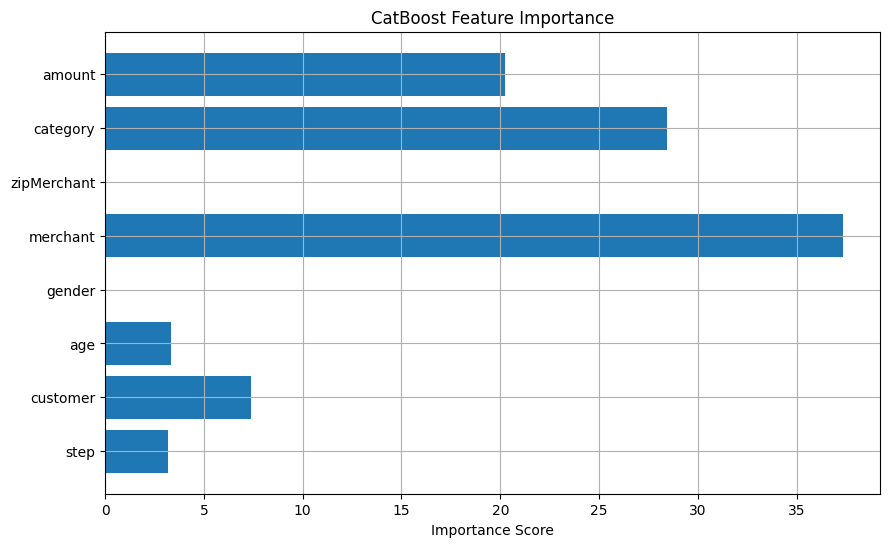

In [ ]:
import matplotlib.pyplot as plt

feature_importance = cat_model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(cat_model, "catboost_model.pkl")


['catboost_model.pkl']

In [ ]:
# AutoEncoder metrics already printed

# CatBoost Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("AUC-ROC (CatBoost):", roc_auc_score(y_test, y_proba_cat))


[[57694    78]
 [  204   654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57772
           1       0.89      0.76      0.82       858

    accuracy                           1.00     58630
   macro avg       0.94      0.88      0.91     58630
weighted avg       0.99      1.00      1.00     58630

AUC-ROC (CatBoost): 0.997498405031466


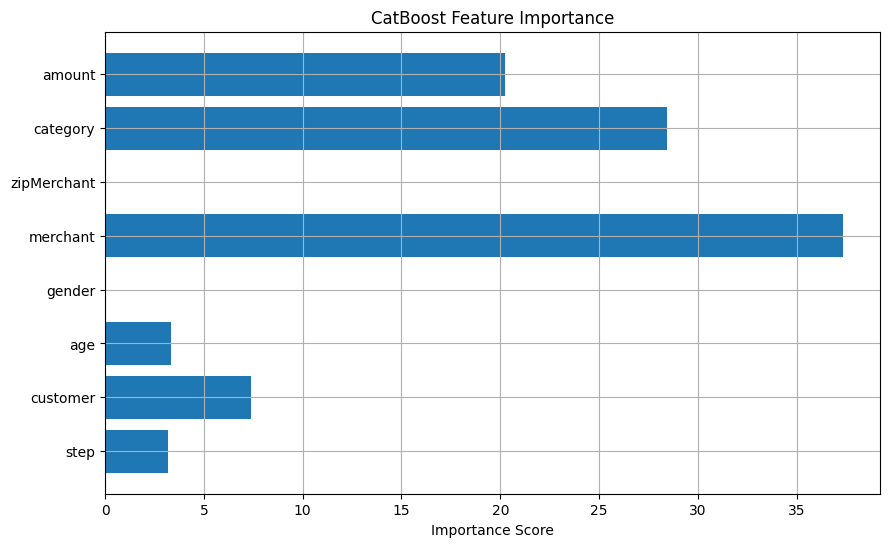

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X.columns, cat_model.get_feature_importance())
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()


In [ ]:
df[df['fraud'] == 1]['category'].value_counts()
df[df['fraud'] == 1]['merchant'].value_counts().head()


,count
merchant,
34,958
49,865
40,308
2,240
43,170


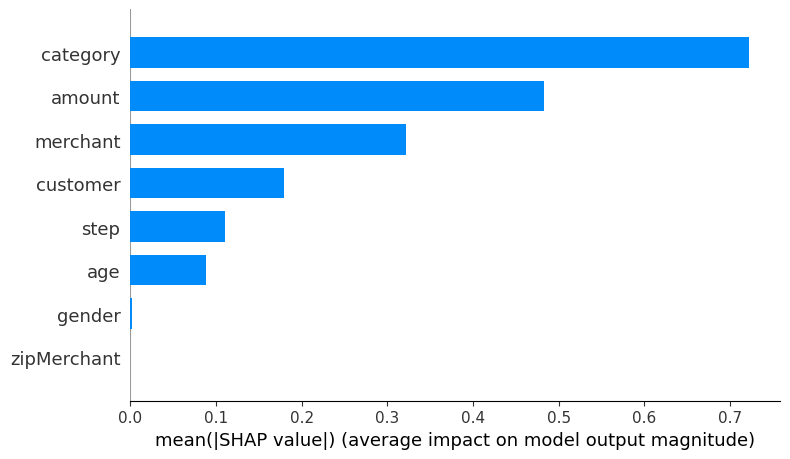

In [ ]:
!pip install shap --quiet
import shap

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
import numpy as np

# Create copy with slight noise
X_test_robust = X_test.copy()
X_test_robust['amount'] = X_test_robust['amount'] + np.random.normal(0, 1, size=X_test_robust.shape[0])

# Predict again
y_robust_pred = cat_model.predict(X_test_robust)
print("Robustness Test Accuracy:", (y_robust_pred == y_pred_cat).mean())


Robustness Test Accuracy: 0.9999317755415317


In [ ]:
import joblib
import time
import os

# Model size
joblib.dump(cat_model, "catboost_model.pkl")
print("Model size (KB):", os.path.getsize("catboost_model.pkl") / 1024)

# Inference time
start = time.time()
_ = cat_model.predict(X_test[:100])
end = time.time()
print("Avg inference time per 100 samples:", end - start)


Model size (KB): 225.56640625
Avg inference time per 100 samples: 0.0026051998138427734


In [36]:
X_train['ae_error'] = np.mean(np.power(X_scaled - autoencoder.predict(X_scaled), 2), axis=1)
X_test['ae_error'] = np.mean(np.power(X_test_scaled - autoencoder.predict(X_test_scaled), 2), axis=1)


7329/7329 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [37]:
X_train['step_hour'] = X_train['step'] % 24
X_test['step_hour'] = X_test['step'] % 24

X_train['step_day'] = X_train['step'] // 24
X_test['step_day'] = X_test['step'] // 24


In [38]:
from catboost import CatBoostClassifier

cat_hybrid = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

cat_hybrid.fit(X_train, y_train)


In [39]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_hybrid = cat_hybrid.predict(X_test)
y_proba_hybrid = cat_hybrid.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_hybrid))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_hybrid))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57772
           1       0.89      0.76      0.82       858

    accuracy                           1.00     58630
   macro avg       0.94      0.88      0.91     58630
weighted avg       0.99      1.00      0.99     58630

AUC-ROC: 0.9975143022640081


In [40]:
import joblib
joblib.dump(cat_hybrid, "final_catboost_model.pkl")
joblib.dump(scaler, "final_scaler.pkl")


['final_scaler.pkl']

In [41]:
def preprocess_test_data(test_df, encoder_dict, scaler, autoencoder):
    # Clean quotes if needed
    for col in test_df.select_dtypes(include='object').columns:
        test_df[col] = test_df[col].str.replace("'", "")

    # Label encode using the same encoders
    for col, encoder in encoder_dict.items():
        test_df[col] = encoder.transform(test_df[col])

    # Drop/handle unknowns like gender if needed
    test_df = test_df[test_df['gender'].isin([0, 1])]

    # Add AE error
    test_scaled = scaler.transform(test_df)
    ae_error = np.mean(np.power(test_scaled - autoencoder.predict(test_scaled), 2), axis=1)
    test_df['ae_error'] = ae_error

    # Add temporal features
    test_df['step_hour'] = test_df['step'] % 24
    test_df['step_day'] = test_df['step'] // 24

    return test_df


In [42]:
def generate_submission(test_df, model):
    predictions = model.predict(test_df)
    submission = pd.DataFrame({
        "ID": test_df.index,  # Or replace with actual ID column if given
        "fraud": predictions
    })
    submission.to_csv("submission.csv", index=False)
    print("✅ submission.csv created.")


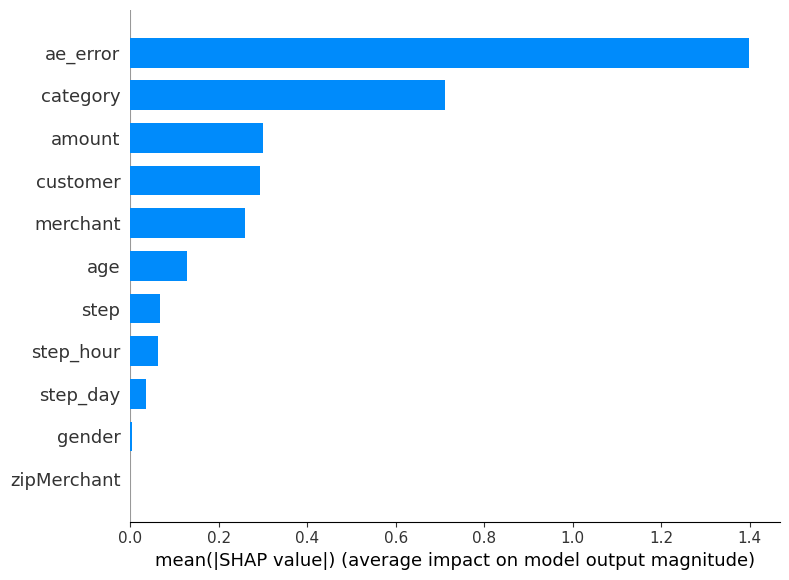

In [43]:
import shap
explainer = shap.TreeExplainer(cat_hybrid)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
